Quantum Cryptography - Unbreakable Security

Quantum cryptography leverages the principles of quantum mechanics to create secure communication channels. One of the most well-known applications is Quantum Key Distribution (QKD), which allows two parties to generate a shared, secret key used for encrypting and decrypting messages.

🔍 Why is Quantum Cryptography important?
Quantum cryptography provides a level of security that is theoretically unbreakable by any classical or quantum computer, thanks to the principles of quantum mechanics. This is crucial for protecting sensitive information in an era where data security is of paramount importance.

Below is a simple example in Qiskit to demonstrate the BB84 protocol, a widely known QKD protocol

In [7]:
# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Function to create a random binary string
def random_bitstring(length):
    return ''.join(np.random.choice(['0', '1'], size=length))

# Alice's key and basis
key_length = 8
alice_key = random_bitstring(key_length)
alice_basis = random_bitstring(key_length)

# Create Alice's quantum circuit
alice_circuits = []
for bit, basis in zip(alice_key, alice_basis):
    qc = QuantumCircuit(1, 1)
    if bit == '1':
        qc.x(0)
    if basis == '1':
        qc.h(0)
    qc.barrier()
    alice_circuits.append(qc)

# Bob's basis
bob_basis = random_bitstring(key_length)

# Create Bob's measurement circuits
bob_circuits = []
for basis, qc in zip(bob_basis, alice_circuits):
    if basis == '1':
        qc.h(0)
    qc.measure(0, 0)
    bob_circuits.append(qc)

# Use the Qiskit Aer simulator to run the circuits
simulator = AerSimulator()
results = [simulator.run(transpile(qc, simulator), shots=1, memory=True).result().get_memory()[0] for qc in bob_circuits]

# Bob's key
bob_key = ''.join(results)

# Compare basis to find the shared secret key
shared_key = ''.join([bit for bit, a_basis, b_basis in zip(alice_key, alice_basis, bob_basis) if a_basis == b_basis])

print("Alice's Key: ", alice_key)
print("Alice's Basis: ", alice_basis)
print("Bob's Basis: ", bob_basis)
print("Bob's Key: ", bob_key)
print("Shared Key: ", shared_key)

Alice's Key:  01011001
Alice's Basis:  11010000
Bob's Basis:  00010000
Bob's Key:  00011001
Shared Key:  011001


In this example, Alice and Bob use the BB84 protocol to generate a shared secret key. Alice prepares qubits based on a random key and basis, and Bob measures them using his own random basis. They then compare their bases over a public channel and discard bits where their bases don't match, leaving them with a shared secret key.

Here are the visualizations of the first few quantum circuits used in the BB84 protocol:


Circuit 1 - Alice's preparation and Bob's measurement:
Alice:


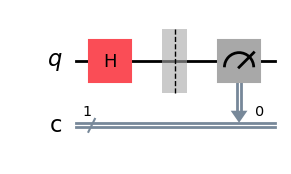

Bob:


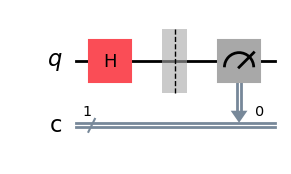


Circuit 2 - Alice's preparation and Bob's measurement:
Alice:


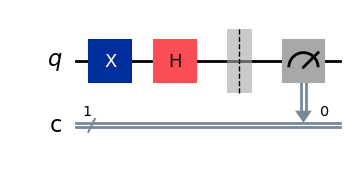

Bob:


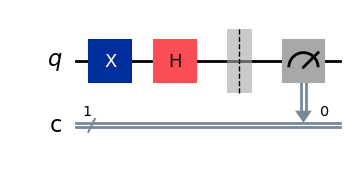


Circuit 3 - Alice's preparation and Bob's measurement:
Alice:


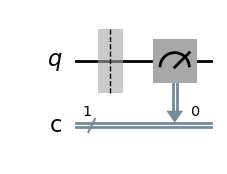

Bob:


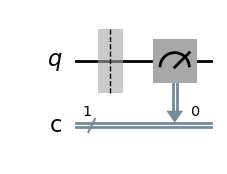

In [9]:
# Visualize the first few circuits
for i in range(3):
    print(f"\nCircuit {i+1} - Alice's preparation and Bob's measurement:")
    print("Alice:")
    display(alice_circuits[i].draw('mpl'))
    print("Bob:")
    display(bob_circuits[i].draw('mpl'))
